In [6]:
from sympy import erf, sqrt, exp, symbols, diff, init_printing, pi
import matplotlib.pyplot as plt 
import scipy.optimize as so 
import numpy as np 
import scipy.special as ss
init_printing() 

## Wmax

+ for maximum plume length y = 0 
+ erf$(x)$ is in scipy.special -have to be imported from there
+ erf$(x)$ is also a part of sympy function.
+ erf$(-x)$ = -erf$(x)$: It is an odd function

We begin with eq (9) of the WRR (2011) paper, which is

$$
C(x, y, z) =
\frac{2}{\pi} (\gamma C_D^\circ + C_A^\circ) \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}x}}\bigg)\bigg ]\\
\cdot\sum_{n=1}^{\infty} \frac{1}{(2n-1)} e^{\big(-\alpha_{Tv}\,x\,(\pi/2M)^2\big) }\sin\Big((2n-1)\frac{\pi z}{2 M}\Big)\\ - C_A^\circ -C^\ast = 0
\label{eq1}
$$


Let  $ A=  (\gamma C_D^\circ + C_A^\circ) $, $n= 1$ and $z = M$, eq $\ref{eq1}$ then becomes

$$
C(x, y, M) =
\frac{2}{\pi} A \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}x}}\bigg)\bigg ]\\
\cdot e^{\big(-\alpha_{Tv}\,x\,(\pi/2M)^2\big) } \sin\Big(\frac{\pi}{2}\Big)- C_A^\circ - C^\ast = 0
\label{eq2}
$$

$\sin(\pi/2) = 1$, so eq $\ref{eq2}$ becomes

$$
C(x, y, M) =
\frac{2}{\pi} A \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}x}}\bigg)\bigg ]\\
\cdot e^{\big(-\alpha_{Tv}\,x\,(\pi/2M)^2\big)}- C_A^\circ- C^\ast = 0
\label{eq3}
$$

Let $ B = \frac{\pi^2}{4M^2}\alpha_{Tv}$ and let $D =(C_A^\circ + C^\ast)$ then eq $\ref{eq3}$ becomes

$$
C(x, y, M) =
\frac{2}{\pi} A \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}x}}\bigg)\bigg ]\\
\cdot e^{(-B x)}- D = 0
\label{eq4}
$$

Eq. \eqref{eq4} can be rewritten as:

$$
\frac{2}{\pi} A \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}x}}\bigg)\bigg ]\\
\cdot e^{(-B x)} =  D
\label{eq5}
$$

In [4]:
x,y,M, W, ath, A, B, D =symbols('x, y, M, W, ath, A, B, D')  

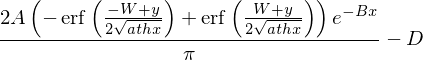

In [7]:
eq4 = 2/pi*A*(erf((y+W)/sqrt(4*ath*x))-erf((y-W)/sqrt(4*ath*x)))*exp(-B*x)- D
eq4 

The total derivative of left side of  eq $\eqref{eq4}$, with respect to $x$ is 
$$
\frac{\partial C (x,y,M)}{\partial x} = \frac{\partial C (x)}{\partial x}\frac{dx}{dx} + \frac{\partial C (y)}{\partial y} \frac{dy}{dx}+\frac{\partial C (M)}{\partial M} \frac{dM}{dx}
\label{eq6}
$$

in which $M$ is invariant with respect to $x$, so $\frac{dM}{dx} = 0$ and as a requirement for the maximum width, which is along $y$, $\frac{dy}{dx} = 0$ has to be set. Thus, we have  only $\frac{\partial C (x)}{\partial x}$, unsolved left in $\eqref{eq5}$. Next, we obtain that 

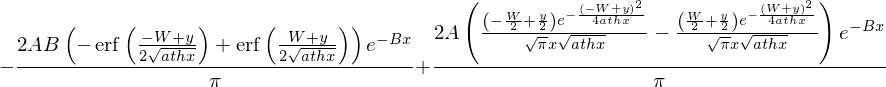

In [8]:
eq6 = diff(eq4, x) # dc/dx
eq6 

$$
-\frac{2 A B \left(- \text{erf}{\left (\frac{- W + y}{2 \sqrt{ath x}} \right )} + \text{erf}{\left (\frac{W + y}{2 \sqrt{ath x}} \right )}\right) e^{(- B x)}}{\pi} + 
\\
\frac{2 A \left(\frac{\left(- \frac{W}{2} + \frac{y}{2}\right) \exp\big({- \frac{\left(- W + y\right)^{2}}{4 ath x}}\big)}{\sqrt{\pi} x \sqrt{ath x}} - \frac{\left(\frac{W}{2} + \frac{y}{2}\right) \exp\big(- \frac{\left(W + y\right)^{2}}{4 ath x}\big)}{\sqrt{\pi} x \sqrt{ath x}}\right) e^{(- B x)}}{\pi} = 0
\label{eq7}
$$

Using eq $\eqref{eq5}$, eq $\eqref{eq7}$ can be simplified to

$$
-B D +\frac{2 A }{\pi}\left(\frac{\left(- \frac{W}{2} + \frac{y}{2}\right) e^{- \frac{\left(- W + y\right)^{2}}{4 ath x}}}{\sqrt{\pi} x \sqrt{ath x}} - \frac{\left(\frac{W}{2} + \frac{y}{2}\right) e^{- \frac{\left(W + y\right)^{2}}{4 ath x}}}{\sqrt{\pi} x \sqrt{ath x}}\right) e^{(- B x)}=0
\label{eq8}
$$

Eq. $\eqref{eq4}$ and eq. $\eqref{eq8}$ are two identical non-linear equations with two unknowns ($x$ and $y$).  Simultaneous solution of these two equations will provide the co-ordinate of the position of maximum width. 

**Solving strategy**

Numerical methods has to be applied. Good initial value can be $x= L/2$ and $y = W$. These can be obtained from the 3D model. Numerical methods to check:

1. **Sympy** based Symbolic algorithms <mark>_**solve**_</mark> and <mark>_**nsolve**_</mark> algorithms (check flags, e.g. Force= True, manual = True etc). This can provide a direct solution.  
2. **Scipy** algorithms <mark>_**fsolve**_</mark>, <mark>_**root**_</mark> and non-linear solvers: <mark>_**Newton Krylov (JFNK)**_</mark> method, <mark>_**Broyden1**_</mark> method. 




## Important points for solving non-linear algebraic system

1. **Bisection method** used in solving an univariate non-linear equation; do not have an equivalent for non-linear system.

2. **Newton method** is generalized to the multivariate equation system.
In this case the iteration formula is $x_{k+1} = x_k - J_f(x_k)^{-1}f(x_k)$ 

> where $J_f(x_k)$ is the Jacobian matrix of function $f(x)$

> Instead of inverting the Jacobian it is sufficient to solve the linear equation system using $J_f(x_k)\delta x_k = -f(x_k)$, and update $x_k$ using $x_{k+1} = x_k + \delta x_k$

3. **Secant Method** for an univariate system has several variants for multivariate system, in which computing Jacobian is avoided.

> Broyden's method is a popular secant method for multivariate system

## Python Codes
### Library: `Scipy.optimize`
### Functions: `fsolve` (general), `broyden1` and `broyden2`.

The functions general arguments are: f(*equation array*, *initial guess*). *fprime* is optional argument in `fsolve` function that is used for calculating Jacobian of $f(x)$  

### The equations to solve 

$$
\frac{2}{\pi} A \bigg[\text{erf}\bigg(\frac{y+W}{\sqrt{4\alpha_{Th}\,x}}\bigg) -  \text{erf}\bigg(\frac{y-W}{\sqrt{4\alpha_{Th}\,x}}\bigg)\bigg ]\\
\cdot e^{(- B x)}- D = 0
$$

$$
-B D +\frac{2 A }{\pi}\left(\frac{\left(- \frac{W}{2} + \frac{y}{2}\right) e^{- \frac{\left(- W + y\right)^{2}}{4 ath \,x}}}{\sqrt{\pi} x \sqrt{ath\,x}} - \frac{\left(\frac{W}{2} + \frac{y}{2}\right) e^{- \frac{\left(W + y\right)^{2}}{4 ath x}}}{\sqrt{\pi} x \sqrt{ath \,x}}\right) e^{(- B x)}=0
$$

In [70]:
# input value

W = 2 # Width
M = 1 # Thickness
ath = 0.01 # transverse horizontal disp.
atv = 0.001 # transverse vertical disp.
Cd = 5 # donor conc.
Ca = 8 # acceptor conc.
Ct = 0 # thereshold conc.
ga = 3.5 # gamma
#intermediate values

A =  (ga*Cd+Ca)
B = (np.pi**2*atv)/(4*M**2)
D = Ca+Ct

# initial guess
x_s = 3000 # Lmax/2, with Lmax obtained from 3D solution 
y_s = 2*W # arbitary 2*W is placed

st = [x_s, y_s]

In [68]:
def f(x):
    return [(2*A)/(np.pi)*(ss.erf((x[1]+W)/(np.sqrt(4*ath*x[0])))-ss.erf((x[1]-W)/(np.sqrt(4*ath*x[0]))))*np.exp(-B*x[0])-D, 
            -B*D + (2*A)/np.pi*np.exp(-B*x[0])*((((-W/2 + x[1]/2)*np.exp(-(x[1]-W)**2/(4*ath*x[0])))/(x[0]*np.sqrt(np.pi*ath*x[0]))) - (((W/2 + x[1]/2)*np.exp(-(x[1]+W)**2/(4*ath*x[0])))/(x[0]*np.sqrt(np.pi*ath*x[0]))))]

In [72]:
so.fsolve(f, st, xtol=1.0e-06, maxfev=5000) # hybrid method from MINPACK

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prabh\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


array([3000.,    4.])

In [71]:
so.root(f, st, method="lm", options={"xtol": 1.0e-08}) # Levenberg-Marquardt

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


   cov_x: array([[ 7.98441041e+06, -1.83642387e+00],
       [-1.83642387e+00,  2.58878749e-02]])
    fjac: array([[-6.21520335e+00, -4.04579872e-03],
       [-1.42950415e-06,  3.53898379e-04]])
     fun: array([-1.77635684e-15,  0.00000000e+00])
    ipvt: array([2, 1], dtype=int32)
 message: 'The relative error between two consecutive iterates is at most 0.000000'
    nfev: 154
     qtf: array([ 2.22832575e-09, -2.44173387e-11])
  status: 2
 success: True
       x: array([103.24878674,  -2.67828979])

In [73]:
so.root(f, st, method="hybr", options={"xtol": 1.0e-06})

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


    fjac: array([[-9.99999992e-01,  1.30327736e-04],
       [-1.30327736e-04, -9.99999992e-01]])
     fun: array([-7.99645861, -0.01973964])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 15
     qtf: array([7.99645597, 0.0207818 ])
       r: array([nan, nan, nan])
  status: 5
 success: False
       x: array([3000.,    4.])

In [74]:
so.root(f,st, method="broyden1", options={"xtol": 1.0e-02})

C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\prabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\prabh\Anaconda3\lib\site-packages\scipy\optimize\nonlin.py:999: RuntimeWarning: invalid value encountered in true_divide
  d = v / vdot(df, v)


     fun: array([-6.21250708,  0.04508048])
 message: 'The maximum number of iterations allowed has been reached.'
     nit: 300
  status: 2
 success: False
       x: array([42.14805601, -3.41915285])